# Import Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

# custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare the Data

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

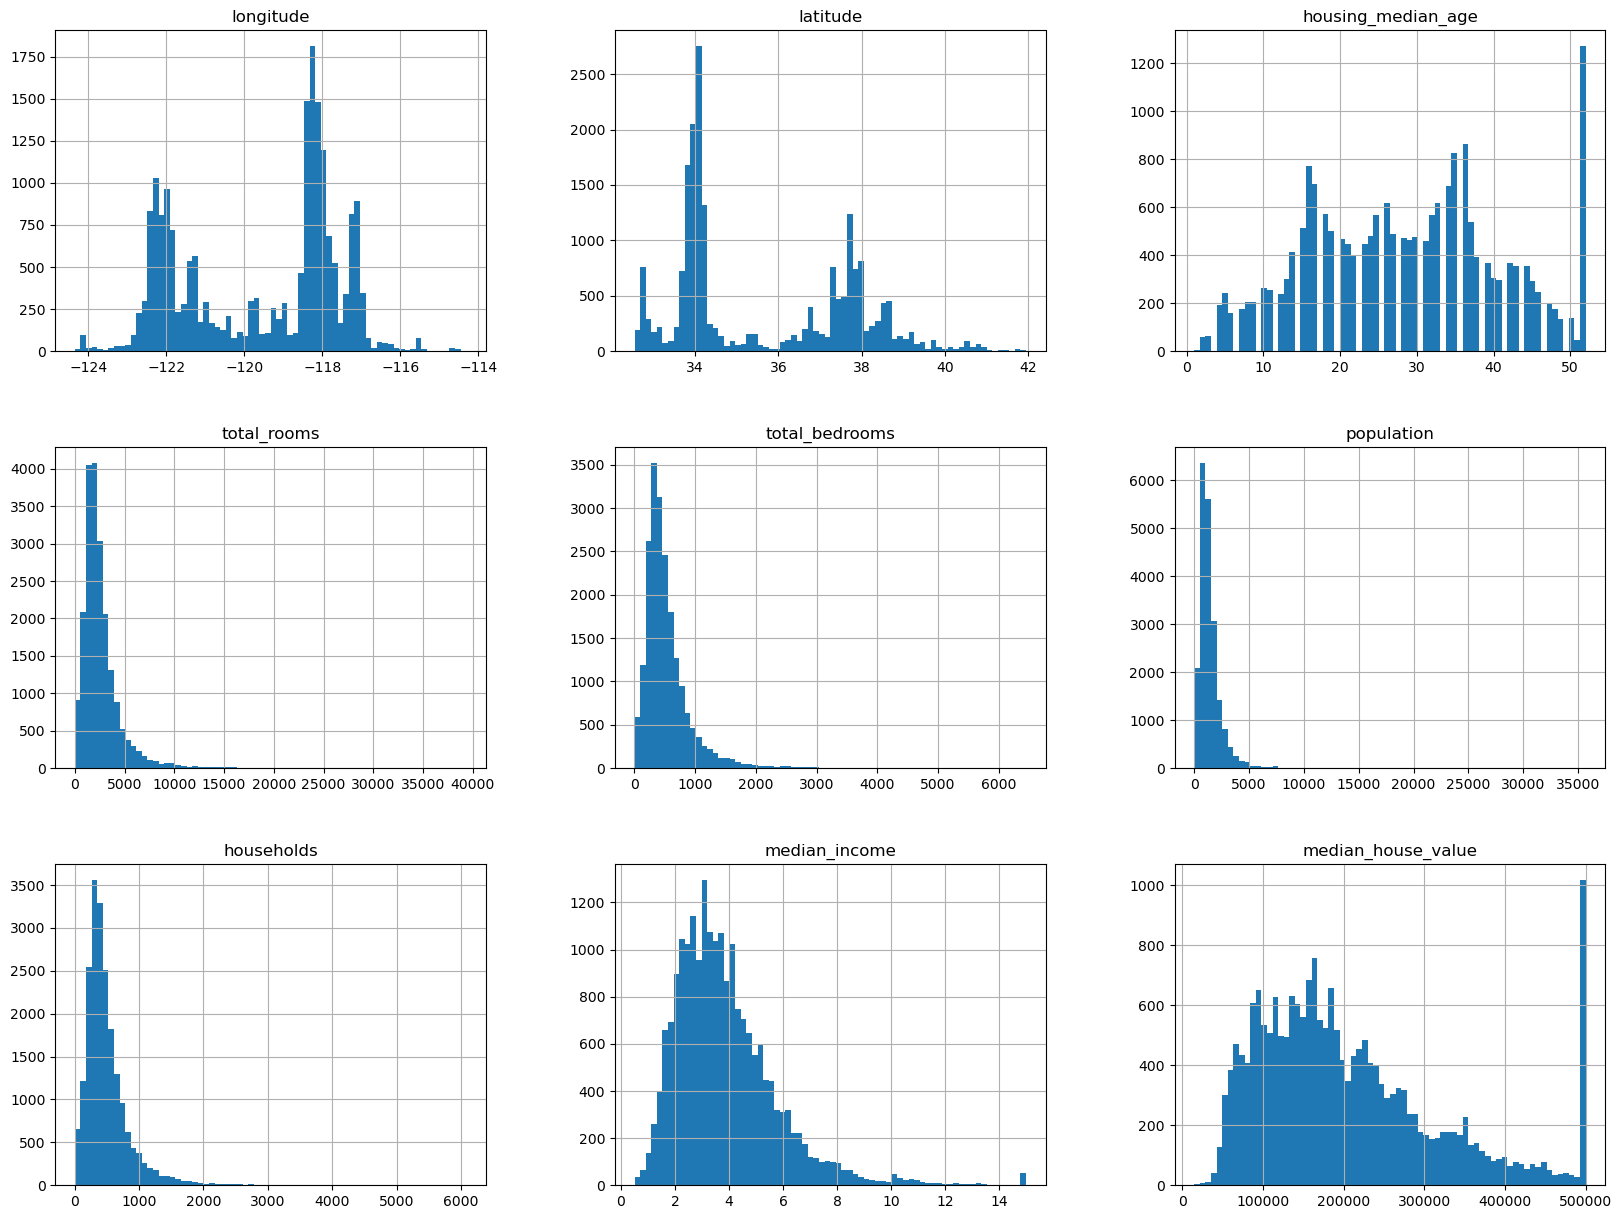

In [8]:
%matplotlib inline
df.hist(bins=70, figsize=(20, 15))

* Before we do anything, we'll make a test suite and put it aside

### Create Test set

In [9]:
def train_test_split_hand_made(data, test_ratio):
    shuffiled_indices = np.random.permutation(len(data))
    print(shuffiled_indices)
    test_set_size = int(len(data) * test_ratio)
    print(test_set_size)
    test_indices = shuffiled_indices[:test_set_size]
    train_indices = shuffiled_indices[test_set_size:]
    print(test_indices)
    print(train_indices)
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_data, test_data = train_test_split_hand_made(df, 0.2)

[18158  1967  7153 ... 14140  2616 17124]
4128
[18158  1967  7153 ... 17293 18857  7353]
[16557 15760 16323 ... 14140  2616 17124]


In [11]:
((len(train_data)/len(df)) * 100), ((len(test_data)/len(df)) * 100)

(80.0, 20.0)

* if you run it again and agin, the function will give you different splitted data, it is not acceptable
* so we will use the trin test split from Sk-Learn

In [12]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Discover and Visualize the data to gain Insight

In [13]:
housing = train_data.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

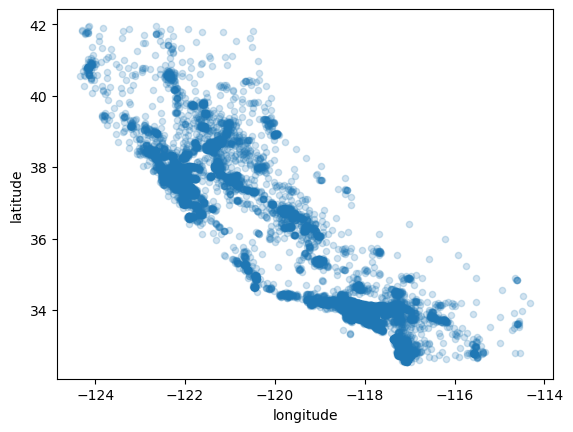

In [14]:
# py using alpha parameter we can see the high-density areas
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

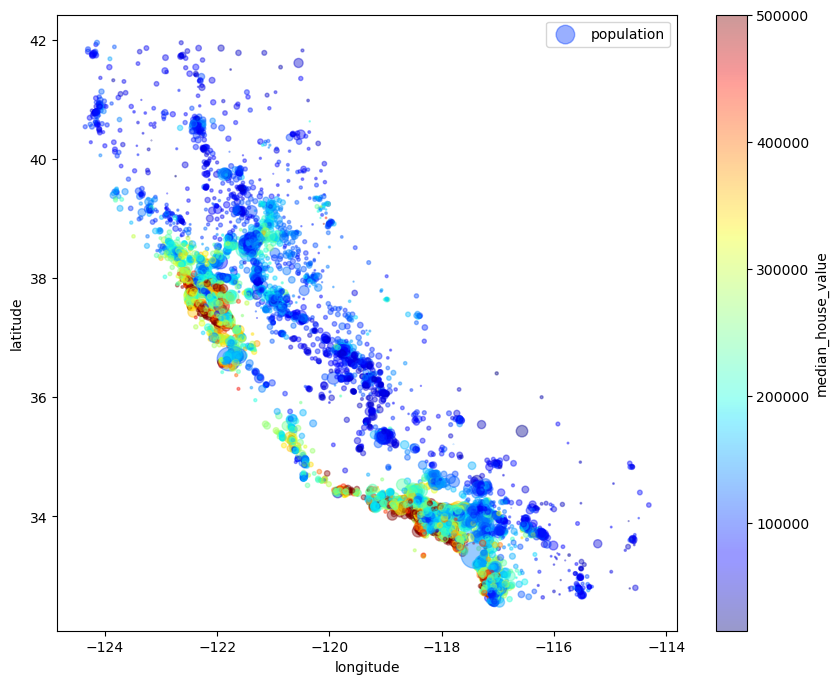

In [15]:
housing.plot(
    kind='scatter', x='longitude', y='latitude', s=housing['population'] /100,
    label='population', figsize=(10, 8), c='median_house_value',
    cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4
)
plt.legend()

* as we see her the housing price are related to the location and the population density

# looking for correlations

In [16]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


* as we see when the relation between two attriputes close to 1, it means that there is a strong positive correlation.
* when the coefficients close to -1, it means that there is a strong negative correlation.
* coefficients close to zero, there is no `Linear correlation`

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlab

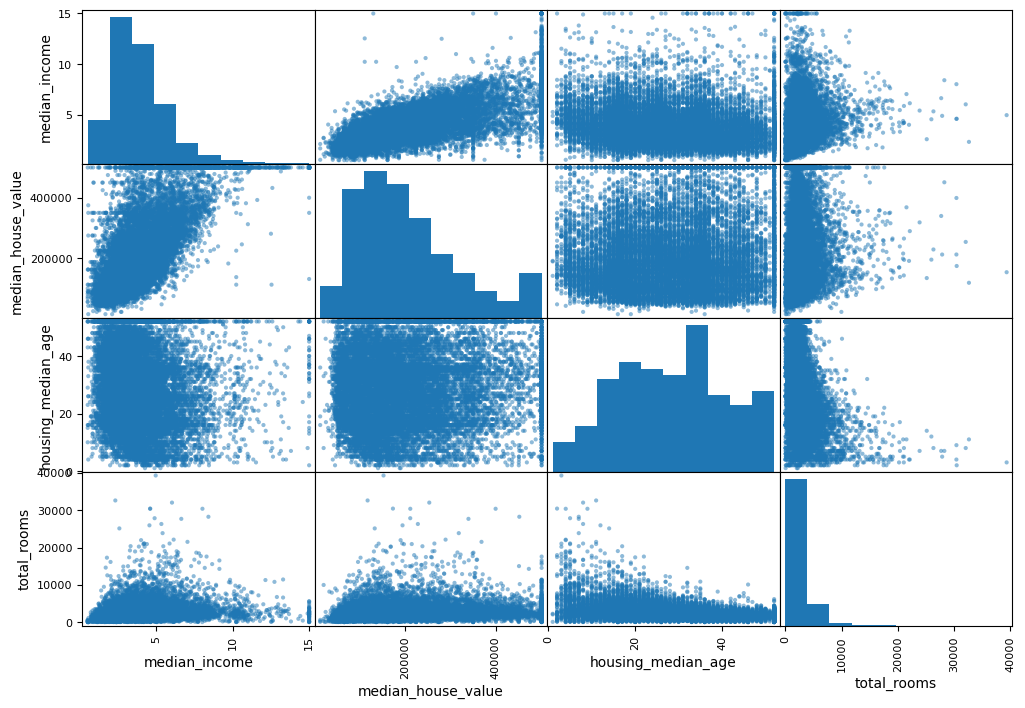

In [17]:
attributes = ['median_income', 'median_house_value', 'housing_median_age', 'total_rooms']
scatter_matrix(housing[attributes], figsize=(12,8))

## Feature Engineering

* try out various attribute combinations, for example the total number of bed rooms is not very useful if you don't know how many households there are. what you realy want is the number of rooms per houshold.

In [18]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

* the total number of bedrooms by itself is not very useful, you probably want to compare it to the number of rooms per households.

In [19]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

* And the population per household also seems like an interesting attribute combination to look at.

In [20]:
housing['population_per_household'] = housing['population'] / housing['households']

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

* the new `bedrooms_per_room` attribute is much more correlated with the median house value than the total number of rooms or bedrooms

# Prepare the data for Machine Learning Algorithms.

In [23]:
housing = train_data.drop('median_house_value', axis=1)
housing_labels = train_data['median_house_value'].copy()

### Data Cleaning

In [24]:
imputer = SimpleImputer(strategy='median')

In [25]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [26]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [28]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [29]:
housing_num.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Handling text and categorical attributes

In [30]:
housing_cat = housing[['ocean_proximity']]

In [31]:
housing_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


In [32]:
ordinal_encoder = OrdinalEncoder()

In [33]:
ordinal_encoder.fit_transform(housing_cat)

array([[4.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

* in this case the Model will assume that two nearby values are more similar than to distant values, so we will use the OneHotEncoding instead of OrdinalEncoding.

In [34]:
one_hot_encoder = OneHotEncoder()

In [35]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

In [36]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [37]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom TRANSFORMERS

In [38]:
# simple class that adds the combined attributes that we descussed earlier in feature engineering sec.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        populations_per_household = X[:, population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, populations_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, populations_per_household]

In [39]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transformation Pipeline

In [40]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [41]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

* now we will make a single transformer able to handle all columns, applying appropriate transformations to each column

In [42]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [43]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [44]:
# finally we did it! 
housing_prepared = full_pipeline.fit_transform(housing)

# Select and frame the model

In [45]:
lin_reg = LinearRegression()

In [46]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

* lets try it out on a few instances from a training set.

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [48]:
some_data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025,  0.22256942,  0.21122752,
         0.76827628,  0.32290591, -0.326196  , -0.17491646,  0.05137609,
        -0.2117846 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.70916212, -0.87669601,  1.61811813,  0.34029326,  0.59309419,
        -0.09890135,  0.6720272 , -0.03584338, -0.40283542, -0.11736222,
         0.34218528,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.44760309, -0.46014647, -1.95271028, -0.34259695, -0.49522582,
        -0.44981806, -0.43046109,  0.14470145,  0.08821601, -0.03227969,
        -0.66165785,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.23269811, -1.38217186,  0.58654547, -0.56148971, -0.40930582,
        -0.00743434, -0.38058662, -1.01786438, -0.60001532,  0.07750687,
         0.78303162,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.10855122,  0.5320839 ,  1

In [56]:
print(f"predictions: {lin_reg.predict(some_data_prepared)}")

predictions: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [54]:
print(f"labels: {some_labels.values}")

labels: [103000. 382100. 172600.  93400.  96500.]


In [65]:
(some_labels.values) - (lin_reg.predict(some_data_prepared))

array([-78746.54359616,  91541.25026495, -72357.50017771, -53098.51061398,
       -66730.42393939])

In [67]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)

In [68]:
lin_rmse

67593.20745775253

* let's try a more complex mode.

In [71]:
tree_reg = DecisionTreeRegressor()

In [73]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [79]:
tree_rmse

0.0

### Cross-Validation

In [90]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

In [91]:
tree_rmse_scores = np.sqrt(-score)

In [93]:
def display_score(score):
    """
    input: score
    output: print score, mean and std for the score
    """
    print(f"The score is: {score}")
    print(f"The mean is: {score.mean()}")
    print(f"the standard deviation is: {score.std()}")

In [94]:
display_score(tree_rmse_scores)

The score is: [65294.4215052  70878.12207007 68561.94239639 70519.8993728
 73431.20984766 67657.46306193 66643.9993271  67966.7302473
 67517.82281632 70064.17546178]
The mean is: 68853.57861065402
the standard deviation is: 2256.811492793337


In [95]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

In [96]:
display_score(np.sqrt(-lin_scores))

The score is: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
The mean is: 67828.38677377408
the standard deviation is: 2468.091395065225


* The decision tree model is overfitting so badly that it performs worse than the linear regression model
* Let's try one last model: `RandomForestRegressor`

In [98]:
forest_reg = RandomForestRegressor()

In [105]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

In [106]:
display_score(np.sqrt(-scores))

The score is: [47208.83334761 51586.64855905 49660.92739838 51943.2022478
 52795.87507113 46904.38948706 47548.9228873  50542.70382464
 48867.09371557 50277.15787037]
The mean is: 49733.57544089154
the standard deviation is: 1963.4554012936915


# Fine-Tune Model

### Grid Search

* `GridSearchCV`: tell it wich hyperparameters you want it to experement with and what values to try out, it will use cross validation to evaluate all the possible combinations of hyperparameters value

In [108]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

In [109]:
forest_reg = RandomForestRegressor()

In [111]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [112]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [114]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [115]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [121]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

64294.25591506061 {'max_features': 2, 'n_estimators': 3}
55040.79068367236 {'max_features': 2, 'n_estimators': 10}
52433.58488965858 {'max_features': 2, 'n_estimators': 30}
59283.606346586545 {'max_features': 4, 'n_estimators': 3}
52700.9053983105 {'max_features': 4, 'n_estimators': 10}
50168.898693821946 {'max_features': 4, 'n_estimators': 30}
58377.87416698363 {'max_features': 6, 'n_estimators': 3}
52170.93045422636 {'max_features': 6, 'n_estimators': 10}
49994.47879237507 {'max_features': 6, 'n_estimators': 30}
57710.28275238329 {'max_features': 8, 'n_estimators': 3}
52313.0664622628 {'max_features': 8, 'n_estimators': 10}
49998.72974624625 {'max_features': 8, 'n_estimators': 30}
62118.017365851316 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53773.53807983227 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59486.12370226185 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52523.64782767597 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Evaluate your model on the test set

In [122]:
final_model = grid_search.best_estimator_

In [123]:
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

In [125]:
X_test_prepared = full_pipeline.transform(X_test)

In [126]:
final_prediction = final_model.predict(X_test_prepared)

In [128]:
final_mse = mean_squared_error(final_prediction, y_test)
final_rmse = np.sqrt(final_mse)

In [129]:
final_rmse

49989.589130693224